# Research Bazaar - UW Madison, 2024

## Title of the workshop

### Instructors:

- Hamid Dashti
- Hangkai You
- Fujiang Ji
- Min Chen


What we cover today:


### NetCDF File Format

**_Definition:_** NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data.

**_Examples:_** Gridded climate data, satellite images, Earth system model outputs.

**_Key Features:_**

- **Self-Describing (very important!):** A netCDF file includes information about the data it contains.

- **Portable:** A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
- **Scalable:** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
- **Appendable:** Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- **Sharable:** One writer and multiple readers may simultaneously access the same netCDF file.
- **Archivable:** Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

**_CF Conventions:_** The purpose of the CF conventions is to require conforming datasets to contain sufficient metadata that they are self-describing in the sense that each variable in the file has an associated description of what it represents, including physical units if appropriate, and that each value can be located in space (relative to earth-based coordinates) and time.

- Enables software tools to display data and perform operations on specified subsets of the data with minimal user intervention.

For more information, you can visit the [NetCDF website](https://www.unidata.ucar.edu/software/netcdf/). And the [CF Convention](http://cfconventions.org/).


### 1. Download Data!

We are going to download the monthly mean of air (2m) temprature from 1948/01-2023/12.

The data is provided by [NOAA Physical Sciences Laboratory](https://psl.noaa.gov/data/gridded/), the GHCN CAMS product.


In [1]:
# import libraries
import xarray as xr
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

In [2]:
# Download the data
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

### [Xarray](https://docs.xarray.dev/en/stable/): Handling NetCDF

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

Most scientific data are multidimensional arrays. We can add labels to this matrices so we can make them easier to work with.

The [Pandas](https://pandas.pydata.org/) is a powerful Python package for this purpose but its limitted to 2-dimensional (e.g. tablular) data.

You can think of xarray as a generalized version of Pandas that can handle n-dimensional data.

With Xarray, we can read, write and process netcdf files.

Some key terminology:

- **DataArray**: A multi-dimensional array with labeled or named dimensions.

- **Dataset**: A collection of DataArray objects.
- **Variable**: A NetCDF-like variable consisting of dimensions, data, and attributes which describe a single array. Backbone of DataArray.
- **Dimension**: The name of the axis of the data. E.g. in math we say 'x' dimension to describe values on x axis, in climate data we can say 'time' dimension to describe that data has a temporal aspect.
- **Coordinates**: An array that labels a dimension or set of dimensions of another DataArray. E.g. for 'x' axis in math we have (0,1,2,...), similarly we can have labels for the 'time' dimension (2000,2001,...).


## 2. Open the data and explore


In [4]:
# Open the air temprature Dataset
ds = xr.open_dataset(savename)
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 912)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html


In [5]:
# Extract the air temprature DataArray
ta = ds["air"]
print(ta)

<xarray.DataArray 'air' (time: 912, lat: 360, lon: 720)>
[236390400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]


In [97]:
# Get variable
print(ta.variable)

<xarray.Variable (time: 912, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods: 

Get dimensions. Note its only names.


In [95]:
ta.dims

('time', 'lat', 'lon')

Get the coordinates. Note these are array of labels (lat/lon values, timestamps)


In [94]:
ta.coords

Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-12-01
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

Get the shape


In [93]:
ta.shape

(912, 360, 720)

In [92]:
ta.attrs

{'long_name': 'Monthly mean of surface temperature',
 'units': 'degK',
 'dataset': 'NOAA/NCEP GHCN CAMS',
 'var_desc': 'Air Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'parent_stat': 'Other',
 'standard_name': 'air_temperature',
 'cell_methods': 'time: mean',
 'valid_range': array([150., 400.], dtype=float32),
 'actual_range': array([-49.21874, 335.75   ], dtype=float32)}

### Indexing and selecting data and simple plotting

Labeling data (as xarray does) make indexing and selecting data very flexible. We can index data based on position or labels.


Index by numper like Python's `[]`:


In [10]:
# Try with different time index
ta[0, :, :]

<xarray.DataArray 'air' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

Let's do a quick plot here. Later we will learn how to make nicer plots.


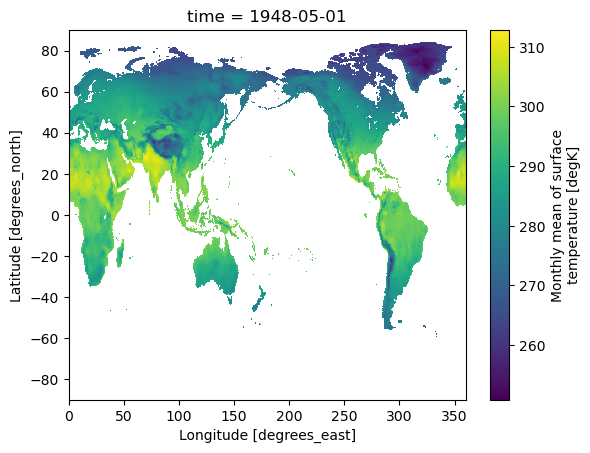

In [11]:
ta[4, :, :].plot()

Save NetCDF files


In [ ]:
# ta.to_netcdf("ta.nc")

Index with dimension names using `isel()` and `sel` methods. Much more intuitive!


In [12]:
# you can do same thing along lat and lonb
data_isel = ta.isel(time=range(0, 12))
print(data_isel)

<xarray.DataArray 'air' (time: 12, lat: 360, lon: 720)>
[3110400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 1948-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]


<xarray.DataArray 'air' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 2023-08-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]


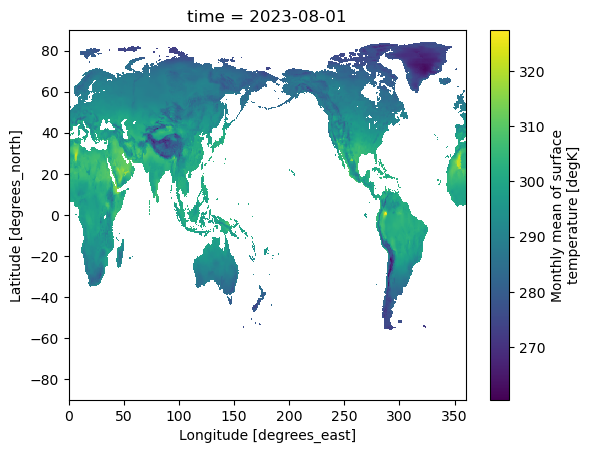

In [13]:
data_sel = ta.sel(time="2023-08-01")
data_sel.plot()
print(data_sel)
# We can slice a range of dates like this:
# data_sel = air.sel(time=slice("1984-01-01", "1984-12-01"))

Nearest neighbor selection


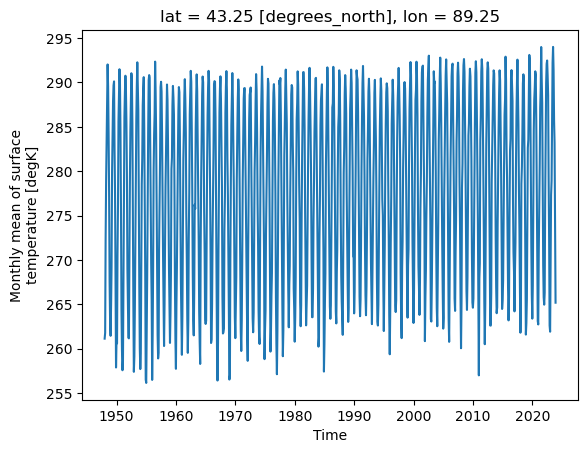

In [14]:
# First let fix the longitude values
ta.coords["lon"] = (ta.coords["lon"] + 180) % 360 - 180
ta = ta.sortby(ta.lon)
nearest_neighbor = ta.sel(lat=43, lon=89, method="nearest")
nearest_neighbor.plot()  # The plot function is smart! it can tell what type of data you are plotting.

## Create Mask with `where()`

The `where()` can come handy in many many situation. For example, we can tell where in the
world temprature was above/below a certain degree.


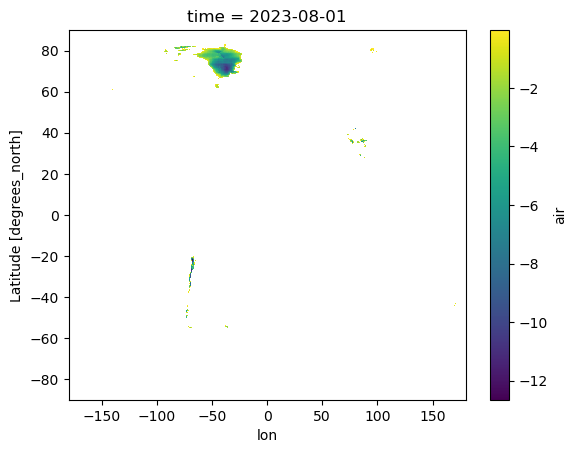

In [15]:
da = ta.sel(time="2023-08-01")
da_c = da - 273.15
da_c.where(da_c < 0).plot()

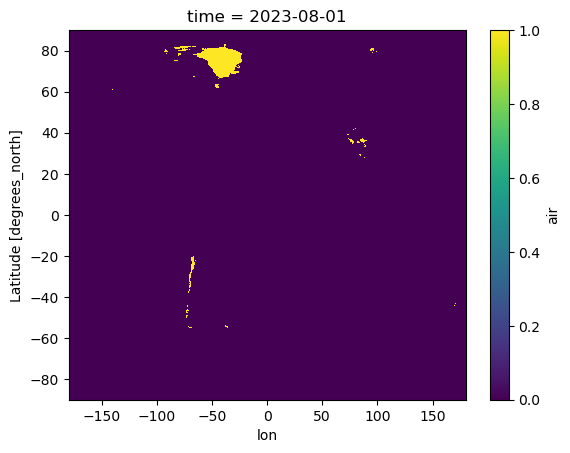

In [16]:
# if you need a true or false mask simply do
mask = da_c < 0
mask.plot()

we can replace the masked regions and replace it with desired data


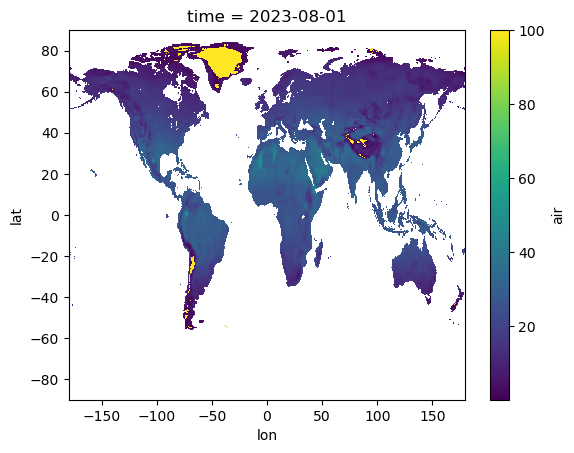

In [17]:
# Replace the below zero values with 100 (just for the sake of example)
da_tmp = xr.where(da_c < 0, 100, da_c)
da_tmp.plot()

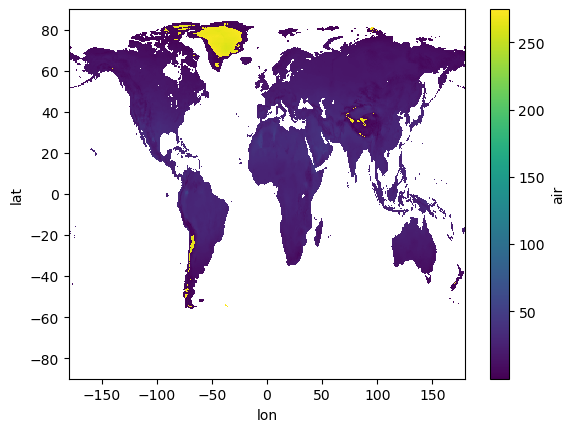

In [18]:
# We can replace it with other DataArrays...
da_tmp = xr.where(da_c < 0, ta.sel(time="1985-08-01"), da_c)
da_tmp.plot()

## 3. Computations


We already saw some simple arithmatic when converting Kelvin to C (air-273.15)

We can use many `numpy` fuctions directly


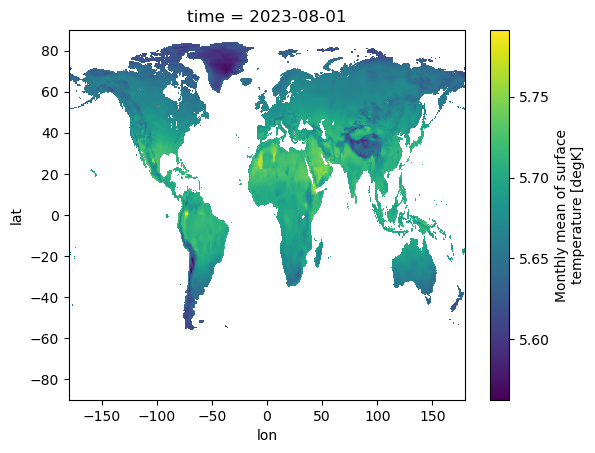

In [70]:
ta_sel = ta.sel(time="2023-08-01")
log_ta = np.log(ta_sel)
log_ta.plot()

In [73]:
ta_sel.to_netcdf("ta_sel.nc")

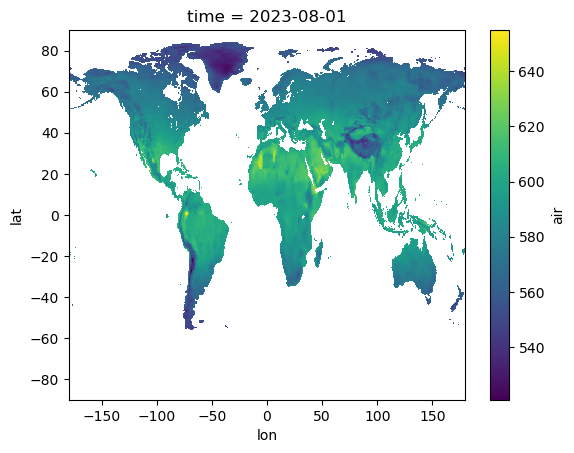

In [20]:
# Operation on two DataArrays
ta_sum = ta_sel + ta_sel
ta_sum.plot()

we can use `isnull()`, `notnull()`, `fillna()`, `dropna()` and a few more to deal with missing data


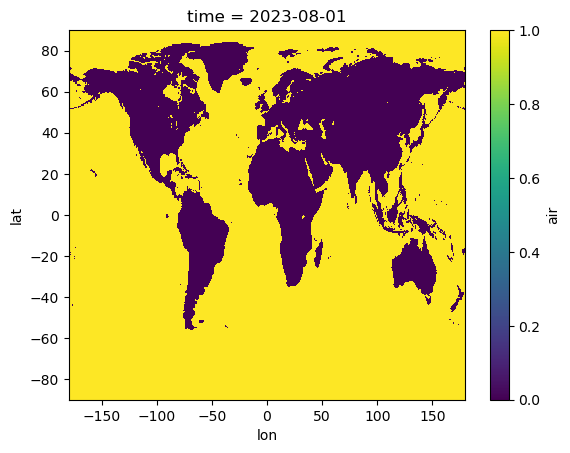

In [21]:
ta_sel.isnull().plot()

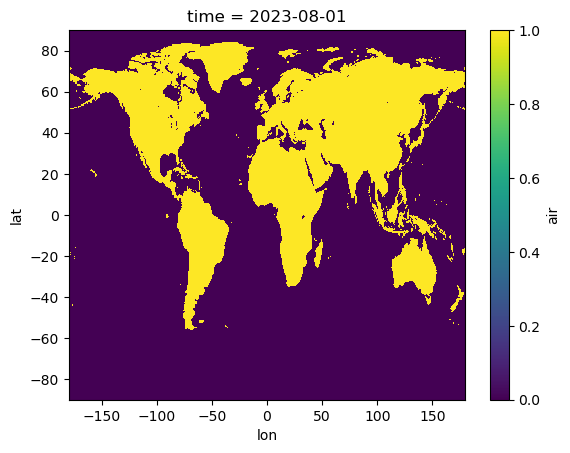

In [22]:
ta_sel.notnull().plot()

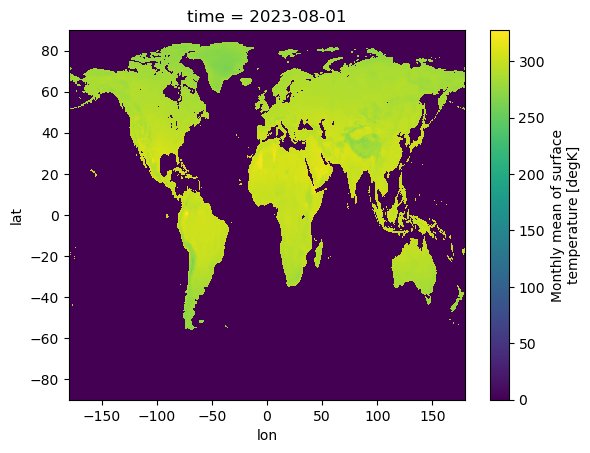

In [23]:
ta_sel.fillna(0).plot()

We can aggreggate data along dimension(s) using the many function provided by xarray or a costume function.


In [24]:
ta_sel_mean = ta_sel.mean()
print(ta_sel_mean)
# Try to sum, std, min, max, median, quantile, etc.

<xarray.DataArray 'air' ()>
array(291.9924, dtype=float32)
Coordinates:
    time     datetime64[ns] 2023-08-01


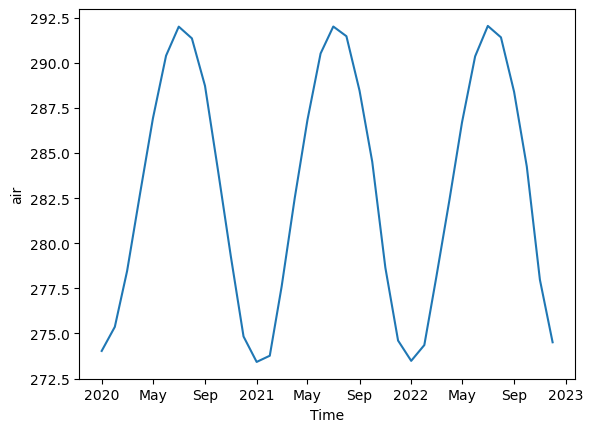

In [25]:
ta_mean = ta.mean(dim=["lat", "lon"])
ta_mean.sel(time=slice("2020-01-01", "2022-12-01")).plot()

### Problem 1: Plot the mean air temprature over the entire globe for the years 1990:2000


Bin and group data using `groupby` and `resample`


In [32]:
annual_ta = ta.groupby("time.year")
print(annual_ta)
# Notice the dimension of the DataArray is now year instead of time

DataArrayGroupBy, grouped over 'year'
76 groups with labels 1948, 1949, 1950, ..., 2022, 2023.


In [35]:
# what if we want to resample the data to a different time frequency?
ta_resample = ta.resample(time="5Y").mean(dim="time")
ta_resample

<xarray.DataArray 'air' (time: 16, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 1948-12-31 1953-12-31 ... 2023-12-31
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

### Problem 2: Calculate the temprature anomaly for the entire time period and plot the anomaly for the 2023/08

A simple equation of anomaly is to subtract climatoligal mean (long term mean) from the data
